In [1]:
import pandas as pd
import seaborn as sns

1

In [24]:
path = "https://stepik.org/media/attachments/lesson/779913/stratified_valid.csv"

df = pd.read_csv(path)
df.head()

car_id  target_reg  num_fold
0  y13744087j     9492.96       NaN
1  O41613818T     2656.23       NaN
2  d-2109686j     1526.11       NaN
3  u29695600e     1338.00       NaN
4  N-8915870N      825.72       NaN

In [25]:
from sklearn.model_selection import StratifiedKFold

df['target_reg_group'] = pd.qcut(df['target_reg'], 10, labels=[f'group_{i}' for i in range(10)])
df['num_fold'] = 0

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) \
                    .split(X=df, y=df['target_reg_group'])

for num, (train_index, test_index) in enumerate(kf):
    df.loc[test_index, 'num_fold'] = num

df.drop('target_reg_group', axis=1, inplace=True)
df.head()

car_id  target_reg  num_fold
0  y13744087j     9492.96         2
1  O41613818T     2656.23         4
2  d-2109686j     1526.11         9
3  u29695600e     1338.00         9
4  N-8915870N      825.72         9

/Users/imushkin/Documents/CompetitiveML/Cars/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


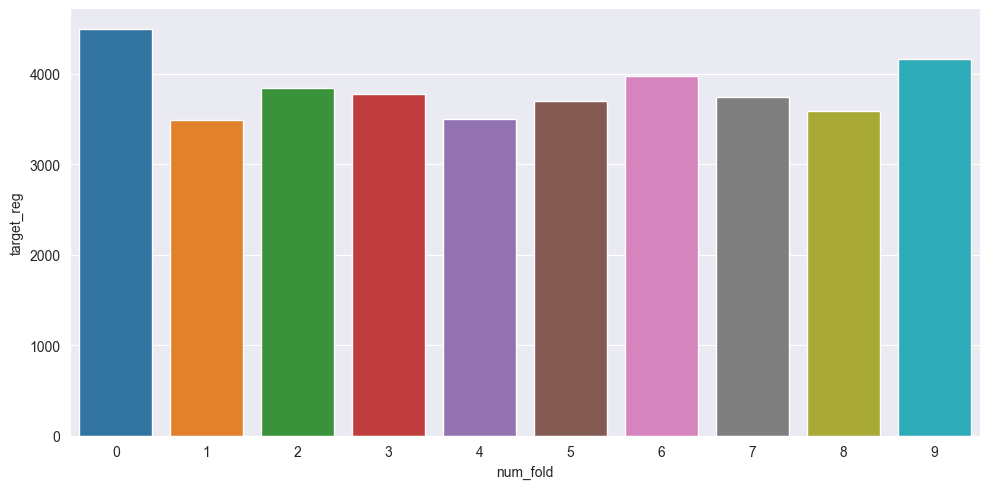

In [26]:
tmp = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', aspect=2, kind="bar");

In [27]:
df.to_csv('../subs/2_4_val_1.csv', index=False)

2

In [31]:
path = "https://stepik.org/media/attachments/lesson/779913/multi_label.csv"

df = pd.read_csv(path)
df.head()

ID  Computer Science  Physics  Mathematics  Statistics  \
0  9431                 1        0            1           1   
1  7960                 1        1            0           1   
2  8578                 1        1            0           1   
3  1651                 1        0            1           1   
4  4011                 1        0            1           1   

   Quantitative Biology  Quantitative Finance  Chemistry  Astrology  \
0                     0                     0          0          0   
1                     0                     0          0          0   
2                     0                     0          0          0   
3                     0                     0          0          0   
4                     0                     0          0          0   

   Spaceology  Life Science  Earth Science  Data Science  
0           0             0              0             0  
1           0             0              0             1  
2           0             1              0             0  
3           0             0              0             0  
4           0             0              0             0

In [37]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

targets = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
           'Quantitative Biology', 'Quantitative Finance', 'Chemistry',
           'Astrology', 'Spaceology', 'Life Science', 'Earth Science', 'Data Science']

df['kfold'] = 0

mskf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42) \
                                .split(X=df, y=df[targets])

for num, (train_index, test_index) in enumerate(mskf):
    df.loc[test_index, 'kfold'] = num

df.head()

ID  Computer Science  Physics  Mathematics  Statistics  \
0  9431                 1        0            1           1   
1  7960                 1        1            0           1   
2  8578                 1        1            0           1   
3  1651                 1        0            1           1   
4  4011                 1        0            1           1   

   Quantitative Biology  Quantitative Finance  Chemistry  Astrology  \
0                     0                     0          0          0   
1                     0                     0          0          0   
2                     0                     0          0          0   
3                     0                     0          0          0   
4                     0                     0          0          0   

   Spaceology  Life Science  Earth Science  Data Science  kfold  
0           0             0              0             0      4  
1           0             0              0             1      3  
2           0             1              0             0      3  
3           0             0              0             0      2  
4           0             0              0             0      0

In [38]:
targets = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
           'Quantitative Biology', 'Quantitative Finance', 'Chemistry',
           'Astrology', 'Spaceology', 'Life Science', 'Earth Science', 'Data Science']
tmp = df.groupby(['kfold'], as_index=False).sum()
tmp_melt = tmp.melt(id_vars = 'kfold', value_vars = targets, value_name = 'count', var_name = 'class')
print(tmp_melt.groupby(['class'], as_index=False).std()['count'].mean())

0.34002113116881


In [39]:
df.to_csv('../subs/2_4_val_2.csv', index=False)